# key words
- decomposition: FactorAnalysis

Factor analysis is similar to PCA. However, there is an important distinction to be made.

**PCA is a linear transformation of the data to a different space where the first component explains the variance of the data, and each subsequent component is orthogonal to the first component**. For example, you can think of PCA as taking a dataset of N dimensions and going down to some space of M dimensions, where M < N.

**Factor analysis**, on the other hand, **works under the assumption that there are only M important features and a linear combination of these features (plus noise) creates the dataset in N dimensions**. To put it another way, you don't do regression on an outcome variable, you do regression on the features to determine the latent factors of the dataset.

Additionally, a big drawback is that you do not know how many columns you can reduce the data to. **PCA gives you the explained variance metric to guide you through the process.**

Correlation coefficient of X.T:
 [[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]
Covariance of X.T before FA:
 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
Covariance of X.T after FA (n2):
 [[ 0.68126364 -0.04284633  1.26570894  0.51508603]
 [-0.04284633  0.1886676  -0.32646537 -0.14309414]
 [ 1.26570894 -0.32646537  3.09553209  1.2866423 ]
 [ 0.51508603 -0.14309414  1.2866423   0.57713221]]


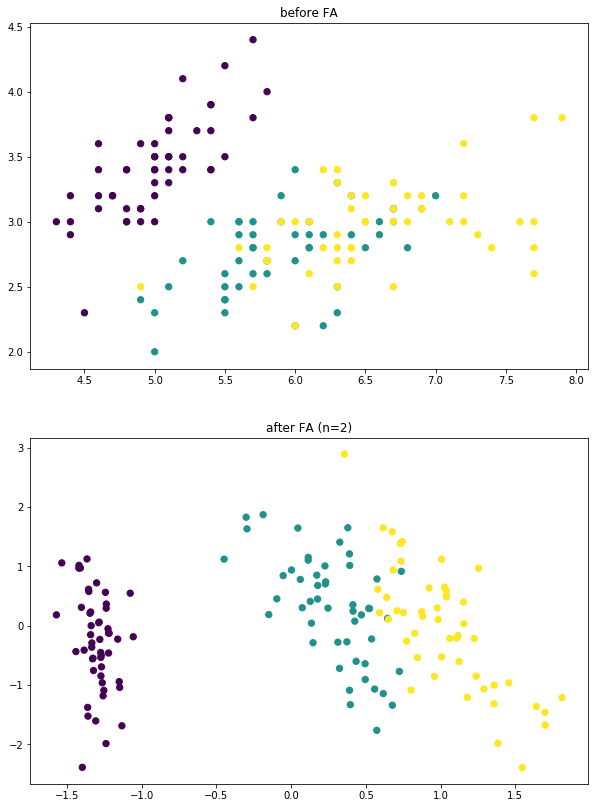

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

from sklearn import decomposition

iris = datasets.load_iris()
X = iris.data
y = iris.target

# to see if corrcoef >= 0.3
print("Correlation coefficient of X.T:\n", np.corrcoef(X.T))
print("Covariance of X.T before FA:\n", np.cov(X.T))

fa_n2 = decomposition.FactorAnalysis(n_components=2)
X_prime_n2 = fa_n2.fit_transform(X)
print("Covariance of X.T after FA (n2):\n", fa_n2.get_covariance())

plt.figure(figsize=(10, 14))

plt.subplot(2, 1, 1, title="before FA")
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)

plt.subplot(2, 1, 2, title="after FA (n=2)")
plt.scatter(X_prime_n2[:, 0], X_prime_n2[:, 1], c=y, s=40)

plt.show()